# Household-Power-Consumption
## Introduction
With the advent of new gadgets and a push towards greater electrification projects globally, power consumption is rising globally. 

Thus, we can also expect that household or residential power consumption is so on the rise. With greater access to global power consumption data, forecasting power consumption is an emerging challenge.

An accurate forecast can help both the consumer as well as the supplier side. For the consumer, a power forecast helps in financial planning as making more green choices overall. For the supplier, an accurate forecast will definitely help in supply regulation. Thus, such models can help to optimize the overall supply chain of the household power industry.

## Project Goal:

<strong> Track the power consumption of individual households in almost real time. </strong>

![Insid1](https://assets.amigoenergy.com/wp-content/uploads/2021/12/the-power-grid-and-electrical-grid.jpg)


## Used Language and Libraries:
  
```
└── Python
      ├── Numpy   
      ├── Pandas
      ├── Matplotlib
      ├── Seaborn
      ├── Sklearn
      ├── datetime
      └── missingno   
       
```

In [1]:
# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Dataset

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

### Data Set Characteristics:
Multivariate, Time-Series

### Associated Tasks:
Regression

### Data Set Information:

This archive contains 185711 (sample of original dataset) measurements gathered between December 2006 and November 2010 (47 months).

## Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements. All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
df = pd.read_csv('data/Household Power Consumption.txt', sep=';')
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.shape

(185711, 9)

In [5]:
df.describe()

,Sub_metering_3
count,185702.000000
mean,6.553521
std,8.469009
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


In [6]:
df['Date'].describe()

count        185711
unique          131
top       18/2/2007
freq           1440
Name: Date, dtype: object

In [7]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           9
dtype: int64

<AxesSubplot:>

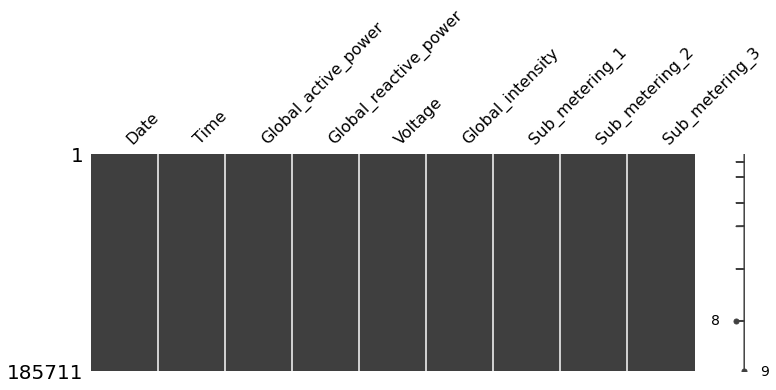

In [8]:
# Number of missing data.
msno.matrix(df, figsize=(12, 4))

In [9]:
# Replace all ? with NAN. 
# This is useful in cases when you know the origin of the data and can be certain which values should be missing.
# Inplace=True parameter means that the changes will be made directly to the original DataFrame. (df), and it won't return a new DataFrame. Instead, the existing DataFrame is modified.
df.replace('?', np.nan, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)

In [10]:
# 24*60 = 1440 
df['Date'].value_counts()

18/2/2007     1440
22/4/2007     1440
19/3/2007     1440
18/3/2007     1440
17/3/2007     1440
              ... 
21/4/2007     1440
20/1/2007     1439
24/4/2007      995
16/12/2006     396
8                1
Name: Date, Length: 131, dtype: int64

In [11]:
df.iloc[49850:49860,:]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,8,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


In [12]:
df.replace({'8': '20/1/2007'}, inplace=True)

In [13]:
df.iloc[49850:49860,:]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49850,20/1/2007,08:14:00,1.122,0.106,237.880,4.800,0.000,0.000,0.0
49851,20/1/2007,08:15:00,1.122,0.108,238.400,4.600,0.000,0.000,0.0
49852,20/1/2007,08:16:00,1.118,0.108,238.230,4.600,0.000,0.000,0.0
49853,20/1/2007,08:17:00,1.606,0.102,237.830,7.600,0.000,0.000,0.0
49854,20/1/2007,08:18:00,3.124,0.084,236.420,13.200,0.000,0.000,0.0
49855,20/1/2007,08:19:00,2.984,0.086,236.340,12.600,0.000,0.000,0.0
49856,20/1/2007,08:20:00,1.622,0.102,238.160,7.800,0.000,0.000,0.0
49857,20/1/2007,08:21:00,0.840,0.114,239.480,3.600,0.000,0.000,0.0
49858,20/1/2007,08:22:00,0.828,0.112,239.070,3.400,0.000,0.000,0.0
49859,20/1/2007,08:23:00,0.834,0.118,240.460,3.400,0.000,0.000,0.0


In [14]:
df.iloc[49860:49870,:]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49860,20/1/2007,08:24:00,1.212,0.110,239.990,6.000,0.000,0.000,0.0
49861,20/1/2007,08:25:00,2.844,0.088,237.700,12.000,0.000,0.000,0.0
49862,20/1/2007,08:26:00,2.832,0.084,237.050,11.800,0.000,0.000,0.0
49863,20/1/2007,08:27:00,1.378,0.102,238.520,6.800,0.000,0.000,0.0
49864,20/1/2007,08:28:00,0.960,0.114,240.700,4.000,0.000,0.000,0.0
49865,20/1/2007,08:29:00,1.160,0.116,241.690,5.000,0.000,0.000,0.0
49866,20/1/2007,08:30:00,1.942,0.108,240.170,8.000,0.000,0.000,0.0
49867,20/1/2007,08:31:00,2.080,0.106,239.990,8.800,0.000,0.000,0.0
49868,20/1/2007,08:32:00,3.980,0.216,238.420,16.600,0.000,0.000,0.0
49869,20/1/2007,08:33:00,4.048,0.316,238.640,17.000,0.000,0.000,0.0


In [15]:
# Check Duplicates
df["is_duplicate"]= df.duplicated()
df.shape

(185711, 10)

In [16]:
# Remove Duplicates 
df = df.drop_duplicates(subset=None,keep="first") # Dropping duplicate rows
df = df.drop(['is_duplicate'],axis=1)  # Dropping created 'is_duplicate' column 
df.shape

(185711, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185711 entries, 0 to 185710
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   185711 non-null  object 
 1   Time                   185711 non-null  object 
 2   Global_active_power    185701 non-null  object 
 3   Global_reactive_power  185702 non-null  object 
 4   Voltage                185701 non-null  object 
 5   Global_intensity       185700 non-null  object 
 6   Sub_metering_1         185702 non-null  object 
 7   Sub_metering_2         185702 non-null  object 
 8   Sub_metering_3         185702 non-null  float64
dtypes: float64(1), object(8)
memory usage: 14.2+ MB


In [18]:
# make dataset numeric
df['Global_active_power'] = [float(x) for x in df['Global_active_power']]
df['Global_reactive_power'] = [float(x) for x in df['Global_reactive_power']]
df['Voltage'] = [float(x) for x in df['Voltage']]
df['Global_intensity'] = [float(x) for x in df['Global_intensity']]
df['Sub_metering_1'] = [float(x) for x in df['Sub_metering_1']]
df['Sub_metering_2'] = [float(x) for x in df['Sub_metering_2']]
df['Sub_metering_3'] = [float(x) for x in df['Sub_metering_3']]

In [19]:
# Replace the missing values with the mean (avarage)
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)

In [20]:
df['Date'].describe() # the unique values shows that there is a dataset of 130 day [from 2006-12-06 to 2007-04-24] 
                    #   and the top freq is 1440 [24 hours * 60 min] that means the data of each min a day

count        185711
unique          130
top       19/2/2007
freq           1440
Name: Date, dtype: object

In [21]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

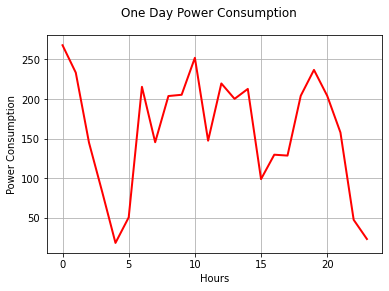

In [22]:
# Plot hourly Power Consumption for one day
df_plot = df[df.Date == '18/2/2007']
df_plot['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

hourly_data = df_plot[['hour', 'Global_active_power']]
hourly_data = df_plot.groupby(['hour'], as_index = False)['Global_active_power'].agg('sum')

plt.plot(hourly_data['hour'], hourly_data['Global_active_power'], 'r', linewidth=2.0)
plt.xlabel('Hours')
plt.ylabel('Power Consumption')
plt.suptitle('One Day Power Consumption')
plt.grid(True)
plt.show()

In [23]:
# merge Date and Time into a datetime
util_series = df['Date'] + ' ' + df['Time']
df['DateTime'] = util_series.apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%M:%S'))
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [24]:
dt = df.copy()

In [25]:
#drop old Date and Time columns
df.drop(columns = ['Date','Time'],inplace = True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,2007-04-24 16:30:00
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,2007-04-24 16:31:00
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,2007-04-24 16:32:00
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,2007-04-24 16:33:00


In [26]:
# Rearranging columns
cols = list(df.columns)
cols = cols[-1:] + cols[:-1]
data = df[cols]
data

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
185706,2007-04-24 16:30:00,0.320,0.082,235.19,1.6,0.0,2.0,0.0
185707,2007-04-24 16:31:00,0.328,0.078,234.53,1.6,0.0,1.0,0.0
185708,2007-04-24 16:32:00,0.344,0.088,234.90,1.8,0.0,1.0,0.0
185709,2007-04-24 16:33:00,0.416,0.174,235.29,2.0,0.0,1.0,0.0


# Data Analysis

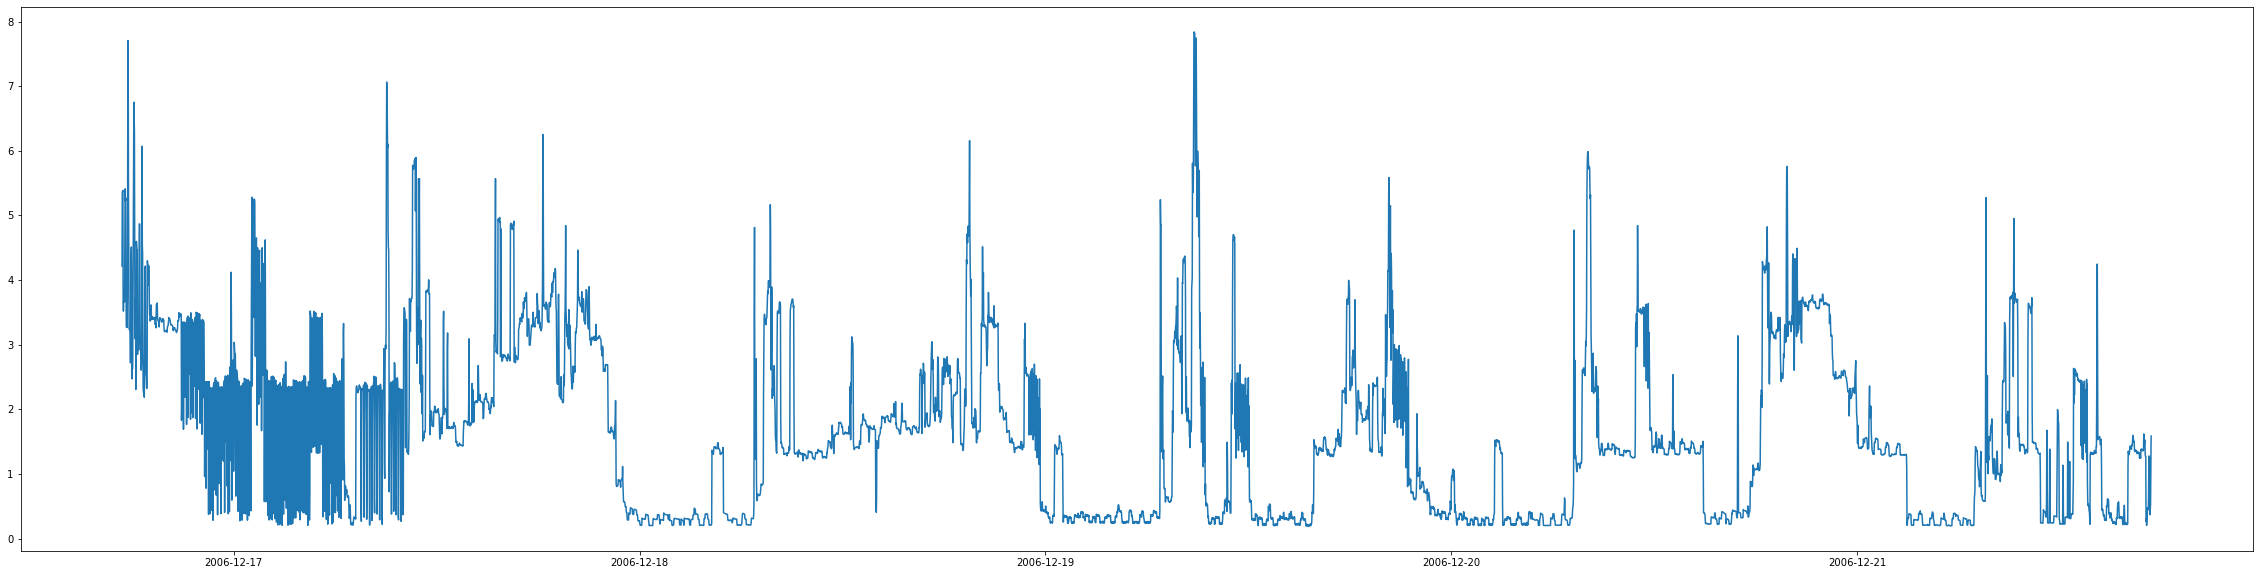

In [27]:
plt.figure(figsize=(40,10))

# plot for 5 days = 7200 minutes
plt.plot(data['DateTime'][:7200],[float(x) for x in data['Global_active_power']][:7200])

In [28]:
data.isnull().any(axis = 1).sum()

0

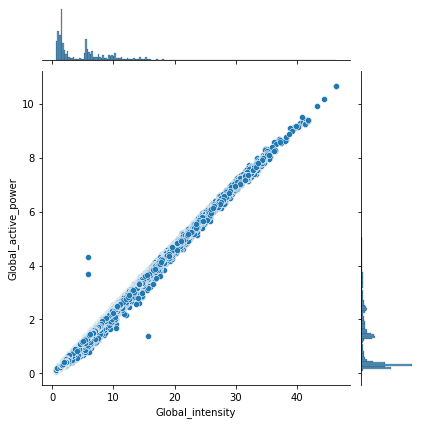

In [29]:
# The correlations between 'Global_intensity', 'Global_active_power'
sns.jointplot(x='Global_intensity', y='Global_active_power', data=df)  
plt.show()

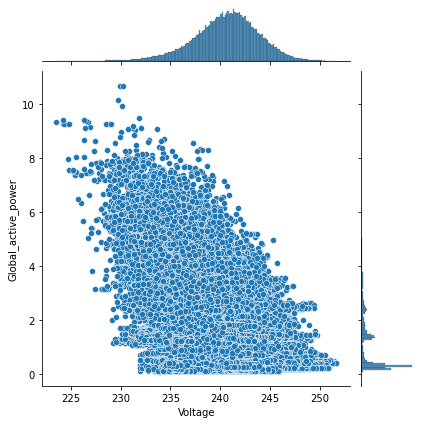

In [30]:
# The correlations between 'Voltage' and  'Global_active_power'

sns.jointplot(x='Voltage', y='Global_active_power', data=df)  
plt.show()

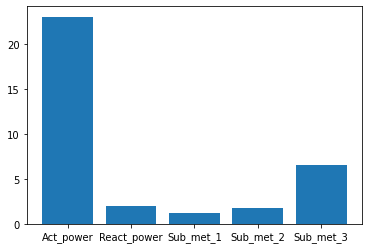

In [31]:
# rename columns
names = ['Act_power', 'React_power', 'Sub_met_1', 'Sub_met_2', 'Sub_met_3'] 
values = [23.042456, 2.027712, 1.232561, 1.783675, 6.553521]
plt.bar(names, values)
plt.show()

#### From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

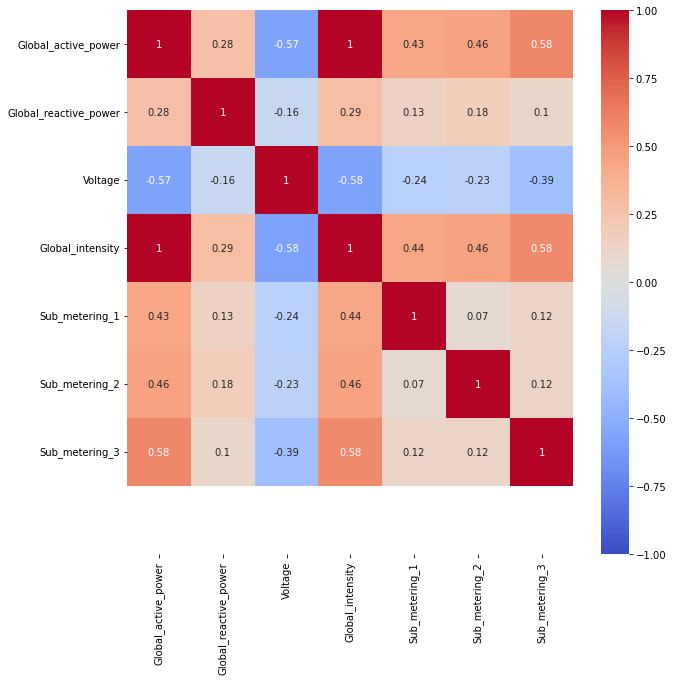

In [32]:
# Calculate correlations among Columns
#There is a strong correlation between 'Global_active_power and 'Global_intensity' beacuse P = V * I
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);
ax.set_ylim(8, 0)
plt.show()


In [33]:
def month(x):
    return x.month
data['Month']= data['DateTime'].apply(lambda x: month(x))

def Day(x):
    return x.Day
data['Day']=data['DateTime'].apply(lambda x: x.day)

def hour(x):
    return x.hour
data['Hour']= data['DateTime'].apply(lambda x: hour(x))

In [34]:
data.drop('DateTime',axis=1,inplace=True)
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Day,Hour
185706,0.320,0.082,235.19,1.6,0.0,2.0,0.0,4,24,16
185707,0.328,0.078,234.53,1.6,0.0,1.0,0.0,4,24,16
185708,0.344,0.088,234.90,1.8,0.0,1.0,0.0,4,24,16
185709,0.416,0.174,235.29,2.0,0.0,1.0,0.0,4,24,16
185710,0.408,0.174,234.82,2.0,0.0,1.0,0.0,4,24,16


<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

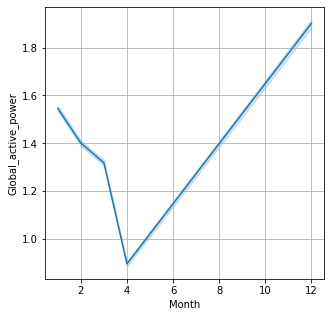

In [35]:
# Monthly change of Global_active_power
plt.figure(figsize=(5,5))
plt.grid('both')
sns.lineplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

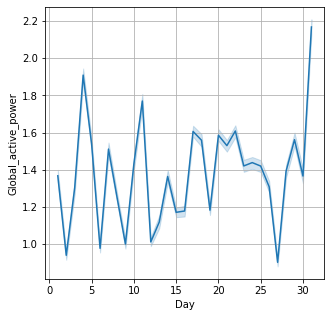

In [36]:
# Dayly change of Global_active_power
plt.figure(figsize=(5,5))
plt.grid('both')
sns.lineplot(x="Day", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Month', ylabel='Global_active_power'>

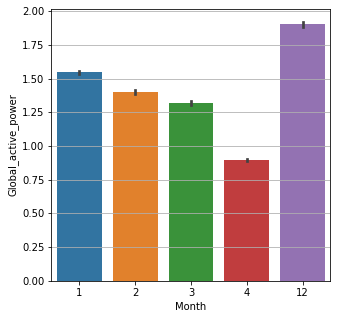

In [37]:
plt.figure(figsize=(5,5))
plt.grid('x')
sns.barplot(x="Month", y="Global_active_power",data=data)

<AxesSubplot:xlabel='Day', ylabel='Global_active_power'>

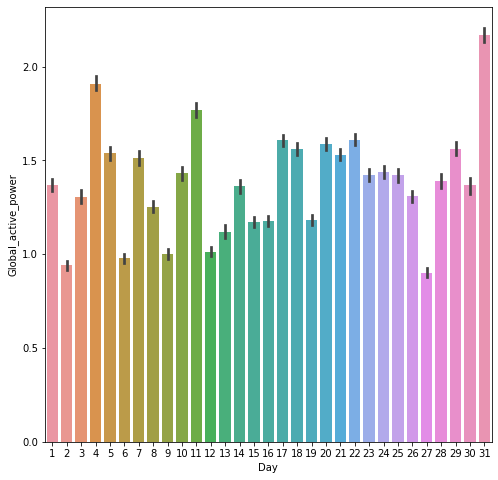

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x="Day", y="Global_active_power",data=data)

# Data Pre-processing

In [39]:
dt.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [40]:
X = df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

In [41]:
X.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0


In [42]:
dt.shape

(185711, 10)

In [43]:
# Rearranging columns
cols = list(dt.columns)
cols = cols[-1:] + cols[:-1]
dt2 = dt[cols]
dt2.head(5)

,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [44]:
# Column for for the remainder of sub metering
# Calculate the energy consumption in kilowatt-hours
eq1 = (dt2['Global_active_power'] * 1000/60)  # Convert Global_active_power to kilowatt-hours

# Calculate the sum of sub metering 1, 2, and 3
eq2 = dt2['Sub_metering_1'] + dt2['Sub_metering_2'] + dt2['Sub_metering_3']

# Calculate the value for the new column 'Sub_metering_4'
dt2['Sub_metering_4'] = eq1 - eq2

# Display the first 3 rows of the updated DataFrame
dt2.head(3)


,DateTime,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [45]:
# drop old Date and Time columns
dt2.drop(columns = ['Date','Time'],inplace = True)
dt2.head(3)

,DateTime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


# Splitting dataset into train, validation, and test

In [46]:
# First, split the data into testing 30% and the rest (training + validation) 70%
X_rem, X_test, y_rem, y_test = train_test_split(
    X,
    y,
    random_state=0,
    test_size=0.30,
)

# Second, split the remaining data (training + validation) into validation 30%
X_train, X_val, y_train, y_val = train_test_split(
    X_rem,
    y_rem,
    random_state=0,
    test_size=0.30,
)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("---------------------")
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print("---------------------")
print("x_val", X_val.shape)
print("y_val", y_val.shape)

x_train (90997, 6)
y_train (90997,)
---------------------
x_test (55714, 6)
y_test (55714,)
---------------------
x_val (39000, 6)
y_val (39000,)


# Helper Function : Evaluate Model

In [47]:
def eval_model(model, X_train, y_train, _val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    return r2_train, r2_val

# Feature scaling

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [49]:
lm = LinearRegression()
eval_model(lm, X_train_scaled, y_train, X_val_scaled, y_val)
predictions = lm.predict( X_test_scaled)

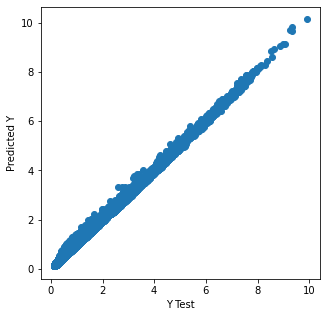

In [50]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [51]:
print('R2 for Linear Regression:', metrics.r2_score(y_test, predictions))

R2 for Linear Regression: 0.9985845710955411


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

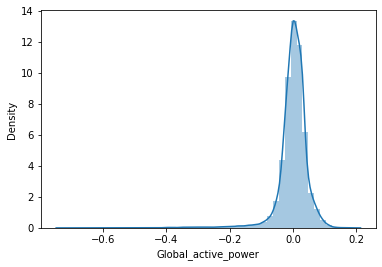

In [52]:
# create a distribution plot (histogram) of the differences between the actual values (y_test) and the predicted values (predictions)
# The resulting array represents the residuals, which are the errors made by the model in its predictions
# 
sns.distplot((y_test-predictions),bins=50)

In [53]:
df_result = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predictions})
df_result

,Actual Value,Predicted Value
15507,1.270,1.265892
96436,1.804,1.765216
139278,0.302,0.260394
151520,1.982,1.975361
38959,2.376,2.328261
...,...,...
104178,0.216,0.187842
13129,1.396,1.363891
77756,2.008,1.971718
88938,1.314,1.309561


# Non Linear Regression

# Hyper Parameters Tuning for degree in Polynomial Features

In [54]:
degree_values = list(range(1, 5)) # 1 2 3 4
r2_train_values = []
r2_val_values = []

for degree in degree_values:
    nonlinear_reg = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('polynomial_features', PolynomialFeatures(degree=degree)),
        ('regression', LinearRegression()),
    ])
    r2_train, r2_val = eval_model(nonlinear_reg, X_train_scaled, y_train, X_val_scaled, y_val)
    r2_train_values.append(r2_train)
    r2_val_values.append(r2_val)
    
results = pd.DataFrame({
    'degree': degree_values,
    'r2_train': r2_train_values,
    'r2_val': r2_val_values,
})

results

,degree,r2_train,r2_val
0,1,0.998498,-9.012111e+01
1,2,0.998795,-3.189084e+03
2,3,0.998898,-1.942921e+05
3,4,0.998953,-8.506383e+11


<p style="font-size: 16px"> from above DataFrame we take R2-Scores with degree 3</p>

<p style="font-size: 18px"> ploting degree in x-axis and r2-score (r2_train, r2_val) in y-axis</p>

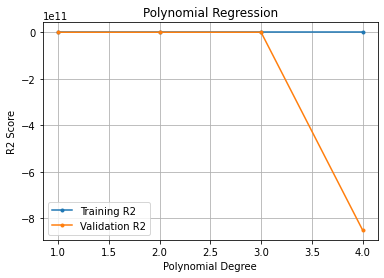

In [55]:
import matplotlib.pyplot as plt


# Plotting the training R2 scores
plt.plot(results['degree'], results['r2_train'], label='Training R2', marker='.')

# Plotting the validation R2 scores
plt.plot(results['degree'], results['r2_val'], label='Validation R2', marker='.')

# Adding labels and title
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Polynomial Regression')
plt.legend()
plt.grid('both')
# Show the plot
plt.show()


In [56]:
best_model = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('regression', LinearRegression()),
])
best_model.fit(X_train_scaled, y_train)
y_pred_test = best_model.predict(X_test_scaled)
r2_score(y_test, y_pred_test)

0.9989754556698835

# Visualizing Our test predictions

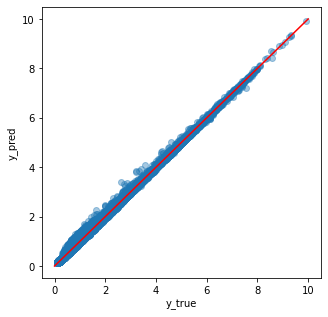

In [57]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.plot([0, 10], [0, 10], c='red')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

# Random Forest (RF)

In [58]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=100,random_state=0,max_depth=3)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_val = rf.predict(X_val)
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(r2_train, r2_val)

0.9796902922896603 0.9794722746614143


## Optimizing n_estimators

In [59]:
n_estimators_values = [5,10,15,20,25,30,35,40]

r2_train_values = []
r2_val_values = []

for n_estimators in n_estimators_values:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=3, random_state=0)
    r2_train, r2_val = eval_model(model, X_train, y_train, X_val, y_val)
    r2_train_values.append(r2_train)
    r2_val_values.append(r2_val)
    
results = pd.DataFrame({
    'n_estimators': n_estimators_values,
    'r2_train': r2_train_values,
    'r2_val': r2_val_values,
})

In [60]:
results['diff']=results['r2_train']-results['r2_val']
results

,n_estimators,r2_train,r2_val,diff
0,5,0.979493,0.979168,0.000325
1,10,0.979567,0.979235,0.000333
2,15,0.979856,0.979553,0.000303
3,20,0.979935,0.979640,0.000295
4,25,0.980064,0.979767,0.000297
5,30,0.979749,0.979473,0.000275
6,35,0.979809,0.979520,0.000289
7,40,0.979843,0.979579,0.000263


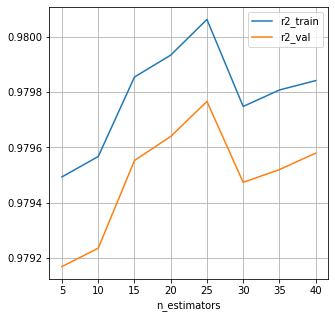

In [61]:
results.plot(x='n_estimators', y=['r2_train', 'r2_val'], figsize=(5,5))
plt.grid(axis='both')
plt.xticks(n_estimators_values)
plt.show()

### Optimizing max_depth

In [62]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
r2_train_values = []
r2_val_values = []

for max_depth in max_depth_values:
    model = RandomForestRegressor(n_estimators=25, max_depth=max_depth, random_state=0)
    r2_train, r2_val = eval_model(model, X_train, y_train, X_val, y_val)
    r2_train_values.append(r2_train)
    r2_val_values.append(r2_val)
    
results = pd.DataFrame({
    'max_depth': max_depth_values,
    'r2_train': r2_train_values,
    'r2_val': r2_val_values,
})

results

,max_depth,r2_train,r2_val
0,1,0.686862,0.686397
1,2,0.929951,0.928336
2,3,0.980064,0.979767
3,4,0.994503,0.994284
4,5,0.997886,0.997754
5,6,0.998523,0.998389
6,7,0.998763,0.998587
7,8,0.998970,0.998764
8,9,0.999113,0.998864


In [63]:
results['diff']=results['r2_train']-results['r2_val']
results

,max_depth,r2_train,r2_val,diff
0,1,0.686862,0.686397,0.000466
1,2,0.929951,0.928336,0.001615
2,3,0.980064,0.979767,0.000297
3,4,0.994503,0.994284,0.000219
4,5,0.997886,0.997754,0.000132
5,6,0.998523,0.998389,0.000134
6,7,0.998763,0.998587,0.000177
7,8,0.998970,0.998764,0.000207
8,9,0.999113,0.998864,0.000249


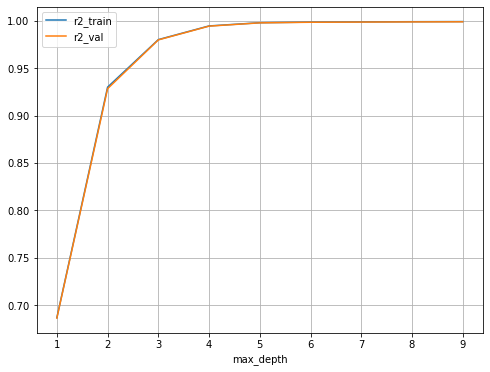

In [64]:
results.plot(x='max_depth', y=['r2_train', 'r2_val'], figsize=(8, 6))
plt.grid(axis='both') # estimators for max_depth = 3 
plt.xticks(max_depth_values)
plt.show()

In [65]:
model_best = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0)
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9803752238470986


In [66]:
print(f'Training R2 Score: {r2_train}')
print(f'Validation R2 Score: {r2_val}')
print(f'Test R2 Score: {r2_score(y_test, y_pred_test)}')

Training R2 Score: 0.9991128401476651
Validation R2 Score: 0.9988640587661459
Test R2 Score: 0.9803752238470986


# KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [68]:
# Create a KNN regressor
model5 = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Evaluate the KNN regressor using the eval_model function
r2_train, r2_val = eval_model(model5, X_train_scaled, y_train, X_val_scaled, y_val)

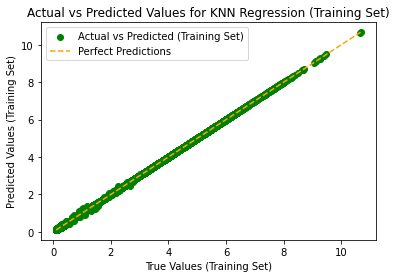

In [69]:
# Plotting for Training Set
y_train_pred = model5.predict(X_train_scaled)
plt.scatter(y_train, y_train_pred, color='green', label='Actual vs Predicted (Training Set)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='orange', label='Perfect Predictions')
plt.xlabel('True Values (Training Set)')
plt.ylabel('Predicted Values (Training Set)')
plt.title('Actual vs Predicted Values for KNN Regression (Training Set)')
plt.legend()
plt.show()

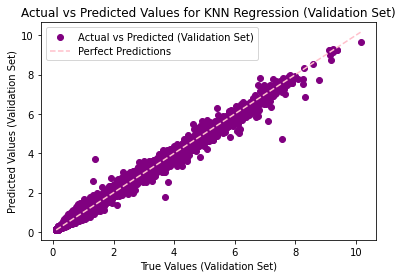

In [70]:
# Plotting for Validation Set
y_val_pred = model5.predict(X_val_scaled)
plt.scatter(y_val, y_val_pred, color='purple', label='Actual vs Predicted (Validation Set)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='pink', label='Perfect Predictions')
plt.xlabel('True Values (Validation Set)')
plt.ylabel('Predicted Values (Validation Set)')
plt.title('Actual vs Predicted Values for KNN Regression (Validation Set)')
plt.legend()
plt.show()

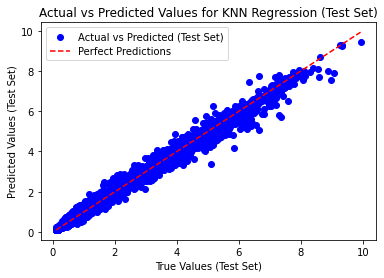

In [71]:
# Plotting for Test Set
y_test_pred = model5.predict(X_test_scaled)
plt.scatter(y_test, y_test_pred, color='blue', label='Actual vs Predicted (Test Set)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')
plt.xlabel('True Values (Test Set)')
plt.ylabel('Predicted Values (Test Set)')
plt.title('Actual vs Predicted Values for KNN Regression (Test Set)')
plt.legend()
plt.show()

In [72]:
print(f'Training R2 Score: {r2_train}')
print(f'Validation R2 Score: {r2_val}')
print(f'Test R2 Score: {r2_score(y_test, y_test_pred)}')

Training R2 Score: 0.999982555075161
Validation R2 Score: -0.46667192273359026
Test R2 Score: 0.9967624762663999


# Decision Tree Regressor

In [73]:
#DecisionTreeRegressor( max_depth=None, min_samples_split=2)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)
dt_reg2 = DecisionTreeRegressor(random_state = 0, max_depth = 5)
dt_reg.fit(X_train, y_train)
dt_reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [74]:
print("train score : ", dt_reg.score(X_train, y_train))

train score :  0.9767084968301715


In [75]:
print("test score : ", dt_reg.score(X_test, y_test))

test score :  0.977321881056382


In [76]:
print("train score : ", dt_reg2.score(X_train, y_train))

train score :  0.9968573699979861


In [77]:
print("test score : ", dt_reg2.score(X_test, y_test))

test score :  0.9969731151944378


In [78]:
#caculate new predict
y_pred = dt_reg.predict(X_test)

In [79]:
print("First 10 test values : \n",y_test[:5])

First 10 test values : 
 15507     1.270
96436     1.804
139278    0.302
151520    1.982
38959     2.376
Name: Global_active_power, dtype: float64


In [80]:
print("First 10 predicted values : \n",y_pred[:5])

First 10 predicted values : 
 [1.34432154 1.74082728 0.29937132 1.74082728 2.3861735 ]


In [81]:
y_pred2 = dt_reg2.predict(X_test)

In [82]:
print("First 10 predicted values : \n",y_pred2[:5])

First 10 predicted values : 
 [1.31487324 1.78303658 0.28378695 1.89597413 2.42926898]


In [83]:
# # Define the parameter grid
# param_grid_dt = {
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [2, 5, 10]
# }

# dt_reg = DecisionTreeRegressor()

# dt_reg = GridSearchCV(dt_reg, param_grid=param_grid_dt, cv=5, scoring='r2')
# dt_reg.fit(X_train, y_train)

# best_dt = dt_reg.best_estimator_
# best_score_dt = dt_reg.best_score_

# print("Best Decision Tree parameters:", best_dt)
# print("Best Decision Tree R2 score:", best_score_dt)

# Support vector machine

In [84]:
from sklearn.svm import SVR

In [85]:
SVRModel = SVR(C=1.0, epsilon=0.1,kernel = 'rbf')

In [86]:
train_r2, val_r2 = eval_model(SVRModel, X_train, y_train, X_val, y_val)

In [87]:
print('R2 Score train equals ',train_r2)
print('R2 Score validation equals ',val_r2)

R2 Score train equals  0.9977184241687787
R2 Score validation equals  0.9976645499790809


In [88]:
y_pred_test = SVRModel.predict(X_test)

In [89]:
print(y_pred_test[:10])

[1.20122323 1.7326498  0.23313083 1.91876723 2.29039761 0.48460688
 0.30645171 2.17763018 2.51502357 3.83197216]


In [90]:
results = pd.DataFrame({
    'y_pred_test': y_pred_test,
    'y_test': y_test,
})
results

,y_pred_test,y_test
15507,1.201223,1.270
96436,1.732650,1.804
139278,0.233131,0.302
151520,1.918767,1.982
38959,2.290398,2.376
...,...,...
104178,0.151963,0.216
13129,1.353629,1.396
77756,1.921646,2.008
88938,1.242944,1.314


In [91]:
# C_values = [0.001, 0.01, 0.1, 1.0]

# mse_train_values = []
# mse_val_values = []
# # SVRModel = SVR(C=1.0, epsilon=0.1,kernel = 'rbf')
# for C in C_values:
#     model = SVR(C = C, epsilon=0.1,kernel = 'rbf')
#     mse_train, mse_val = eval_model(model, X_train, y_train, X_val, y_val)
#     mse_train_values.append(mse_train)
#     mse_val_values.append(mse_val)
    
# results = pd.DataFrame({
#     'C_values': C_values,
#     'mse_train': mse_train_values,
#     'mse_val': mse_val_values,
# })

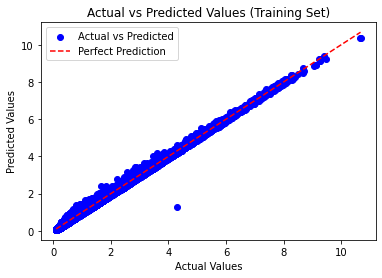

In [92]:
# for training set
y_pred_train = SVRModel.predict(X_train)
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs Predicted Values (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

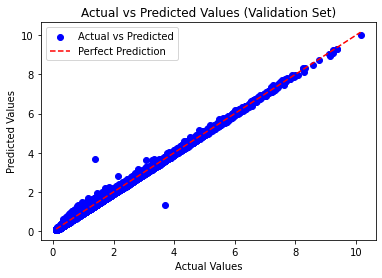

In [93]:
# for validation set
y_pred_val = SVRModel.predict(X_val)
plt.scatter(y_val, y_pred_val, color='blue', label='Actual vs Predicted')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs Predicted Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

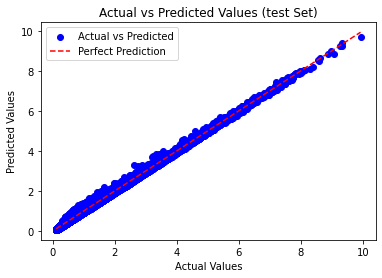

In [94]:
# for test set
y_pred_test = SVRModel.predict(X_test)
plt.scatter(y_test, y_pred_test, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.title('Actual vs Predicted Values (test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()